# E-GraphSAGE

In [7]:
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import torch as th
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

import sys
sys.path.append('a_donner')
import model_gnn_bis
import sklearn

sizeh = 76
size_embedding = 152
nbclasses =  2
n = '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/a_donner/data_enc_FS_'+str(sizeh)+'.csv'
pathmodel= '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/a_donner/GNN_'+str(sizeh)+'.xxx'


data = pd.read_csv(n, encoding="ISO-8859–1")
data2 = pd.read_csv("/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/a_donner/Y_labels.csv", encoding="ISO-8859–1")

data[' Source IP'] = data[' Source IP'].apply(str)
data[' Destination IP'] = data[' Destination IP'].apply(str)
cols = data.columns
#####################
#si beoin d'enlever les noeuds et le label:
#n,m = data.values.shape
#data = data[cols[2:m-1]]

model1 = model_gnn_bis.Model(sizeh, size_embedding, sizeh, F.relu, 0.2).cuda()
model1.load_state_dict(th.load(pathmodel))


lab = data['label']
X1_train, X1_test, y1_train, y1_test = train_test_split(data, lab, test_size=0.005, random_state=123, stratify= lab)
n, m = X1_test.shape
print(n,m)


#model1.G1_train = model1.prep(X1_train, True)
model1.G1_test = model1.prep(X1_test, True)

print(model1.G1_test)

11505 79
Graph(num_nodes=13692, num_edges=11505,
      ndata_schemes={'feature': Scheme(shape=(1, 76), dtype=torch.float32)}
      edata_schemes={'h': Scheme(shape=(1, 76), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)})


In [ ]:
print(model1.G1_test.eda)

### ACC + F1

In [30]:
print("\\\\\\\\\\\\\\\\ NORMAL \\\\\\\\\\\\\\\\\\")
print("nb instances : ", len(X1_test.values))

test_pred1 = model1(G1_test, node_features_test1, edge_features_test1).cuda()
test_pred1 = test_pred1.argmax(1)
test_pred1 = th.Tensor.cpu(test_pred1).detach().numpy()

print('Metrics : ')
print("Accuracy : ", sklearn.metrics.accuracy_score(actual1, test_pred1))
print("Precision : ", sklearn.metrics.precision_score(actual1, test_pred1, labels = [0,1]))
print("Recall : ", sklearn.metrics.recall_score(actual1, test_pred1, labels = [0,1]))
print("f1_score : ", sklearn.metrics.f1_score(actual1, test_pred1, labels = [0,1]))


print("\\\\\\\\\\\\\\\\ ABLATION \\\\\\\\\\\\\\\\\\")
print("nb instances : ", len(X1_test_ab.values))

test_pred1_ab = model1_ab(G1_test_ab, node_features_test1_ab, edge_features_test1_ab).cuda()
test_pred1_ab = test_pred1_ab.argmax(1)
test_pred1_ab = th.Tensor.cpu(test_pred1_ab).detach().numpy()

print('Metrics : ')
print("Accuracy : ", sklearn.metrics.accuracy_score(actual1_ab, test_pred1_ab))
print("Precision : ", sklearn.metrics.precision_score(actual1_ab, test_pred1_ab, labels = [0,1]))
print("Recall : ", sklearn.metrics.recall_score(actual1_ab, test_pred1_ab, labels = [0,1]))
print("f1_score : ", sklearn.metrics.f1_score(actual1_ab, test_pred1_ab, labels = [0,1]))

\\\\\\\\ NORMAL \\\\\\\\\
nb instances :  138050
Metrics : 
Accuracy :  0.9911119159724737
Precision :  0.9679029543212027
Recall :  0.9963851462372658
f1_score :  0.9819375542830224
\\\\\\\\ ABLATION \\\\\\\\\
nb instances :  138050
Metrics : 
Accuracy :  0.9753350235421948
Precision :  0.9160163816481266
Recall :  0.9889463149403998
f1_score :  0.9510853169757654


### Save X_Test + Models + Graphs + Predictions

In [31]:
X1_test.to_csv(f'/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Global_X_Test.csv', sep=',', index = False)

# Models
th.save(model1.state_dict(), '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/GNN.pt')
th.save(model1_ab.state_dict(), '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/GNN_ab.pt')

# Graphs
from dgl.data.utils import save_graphs
save_graphs("/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/G1_test.bin", [G1_test])
save_graphs("/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/G1_test_ab.bin", [G1_test_ab])

np.savetxt('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/test_pred1.txt', test_pred1, fmt='%d')
np.savetxt('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/test_pred1_ab.txt', test_pred1_ab, fmt='%d')

### Load graphs and predictions

In [9]:
# loading Graphs and Predictions
from dgl.data.utils import load_graphs
import numpy as np

Test_Graph = load_graphs("/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/G1_test.bin")
Test_Graph = Test_Graph[0][0]
Test_Graph_ab = load_graphs("/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/G1_test_ab.bin")
Test_Graph_ab = Test_Graph_ab[0][0]

Test_pred_Graph = np.loadtxt('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/test_pred1.txt', dtype=int)
Test_pred_Graph_ab = np.loadtxt('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/test_pred1_ab.txt', dtype=int)


actual1 = Test_Graph.edata['label']
actual1_ab = Test_Graph_ab.edata['label']


# Test the loading
print(actual1)
print(actual1_ab)
aa = actual1 == actual1_ab
aa = aa.numpy()
print(np.where(aa == False))

print(Test_pred_Graph)
print(Test_pred_Graph_ab)
aa = Test_pred_Graph == Test_pred_Graph_ab

print(type(Test_pred_Graph))
print(type(Test_pred_Graph_ab))
print(type(aa))

print(aa)
print(np.where(aa == False))

tensor([1, 1, 0,  ..., 0, 0, 0])
tensor([1, 0, 0,  ..., 0, 0, 0])
(array([     1,      9,     14, ..., 138035, 138036, 138040]),)
[1 1 0 ... 0 0 0]
[1 0 0 ... 0 1 0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ True False  True ...  True False  True]
(array([     1,      9,     14, ..., 138038, 138040, 138048]),)


### Models testing on the graphs

In [10]:
model1_test = Model(76, size_embedding, 76, F.relu, 0.2).cuda()
model1_test.load_state_dict(th.load('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/GNN.pt'))
model1_test.eval()

model1_test_ab = Model(76, size_embedding, 76, F.relu, 0.2).cuda()
model1_test_ab.load_state_dict(th.load('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/GNN_ab.pt'))
model1_test_ab.eval()


print("\\\\\\\\\\\\\\\\ NORMAL \\\\\\\\\\\\\\\\\\")

Test_Graph1 = Test_Graph.to('cuda:0')
node_features_test1 = Test_Graph1.ndata['feature']
edge_features_test1 = Test_Graph1.edata['h']

test_pred1 = model1_test(Test_Graph1, node_features_test1, edge_features_test1).cuda()
test_pred1 = test_pred1.argmax(1)
test_pred1 = th.Tensor.cpu(test_pred1).detach().numpy()

print('Metrics : ')
print("Accuracy : ", sklearn.metrics.accuracy_score(actual1, test_pred1))
print("Precision : ", sklearn.metrics.precision_score(actual1, test_pred1, labels = [0,1]))
print("Recall : ", sklearn.metrics.recall_score(actual1, test_pred1, labels = [0,1]))
print("f1_score : ", sklearn.metrics.f1_score(actual1, test_pred1, labels = [0,1]))


print("\\\\\\\\\\\\\\\\ ABLATION \\\\\\\\\\\\\\\\\\")

Test_Graph_ab1 = Test_Graph_ab.to('cuda:0')
node_features_test1_ab = Test_Graph_ab1.ndata['feature']
edge_features_test1_ab = Test_Graph_ab1.edata['h']

test_pred1_ab = model1_test_ab(Test_Graph_ab1, node_features_test1_ab, edge_features_test1_ab).cuda()
test_pred1_ab = test_pred1_ab.argmax(1)
test_pred1_ab = th.Tensor.cpu(test_pred1_ab).detach().numpy()

print('Metrics : ')
print("Accuracy : ", sklearn.metrics.accuracy_score(actual1_ab, test_pred1_ab))
print("Precision : ", sklearn.metrics.precision_score(actual1_ab, test_pred1_ab, labels = [0,1]))
print("Recall : ", sklearn.metrics.recall_score(actual1_ab, test_pred1_ab, labels = [0,1]))
print("f1_score : ", sklearn.metrics.f1_score(actual1_ab, test_pred1_ab, labels = [0,1]))

\\\\\\\\ NORMAL \\\\\\\\\
Metrics : 
Accuracy :  0.9911626222383194
Precision :  0.9677737490935461
Recall :  0.9967436441310907
f1_score :  0.9820450933066464
\\\\\\\\ ABLATION \\\\\\\\\
Metrics : 
Accuracy :  0.9749873234335386
Precision :  0.9135441921974873
Recall :  0.9905894302870971
f1_score :  0.9505081053189812


### Extract the 3% of difference

In [26]:
print(Test_Graph.edata['Edge_indx'])
print(Test_Graph_ab.edata['Edge_indx'])

tensor([     0,  71207,     22,  ..., 138044, 138045, 138046])
tensor([     0,      1,      2,  ..., 138047, 138048, 138049])


In [27]:
actual1_np = actual1.numpy()
aa = actual1_np == Test_pred_Graph
wrong_preds = np.where(aa == False)[0]
print(wrong_preds)

actual1_ab_np = actual1_ab.numpy()
bb = actual1_ab_np == Test_pred_Graph_ab
wrong_preds_ab = np.where(bb == False)[0]
print(wrong_preds_ab)

[  3495   3825   4535 ... 137915 137984 137995]
[   107    167    274 ... 138031 138038 138048]


In [36]:
wpred = Test_Graph.edata['Edge_indx'][wrong_preds]
wpred_ab = Test_Graph_ab.edata['Edge_indx'][wrong_preds_ab]

print(wpred)
print(wpred_ab)

edges_to_explain = set(wpred_ab.numpy()) - set(wpred.numpy())

print(len(edges_to_explain))
print(edges_to_explain)

tensor([    76,  87306,  79223,  ..., 137736, 137871, 137893])
tensor([   107,    167,    274,  ..., 138031, 138038, 138048])
3124
{65536, 49153, 8194, 24579, 122884, 16391, 73741, 81936, 49170, 49171, 49173, 65560, 106525, 24609, 98343, 90152, 131111, 122923, 90158, 81968, 98355, 114743, 73786, 65595, 106556, 98369, 16453, 90181, 98376, 106568, 16459, 41040, 49233, 65620, 90201, 8283, 122974, 41056, 57440, 32868, 24678, 41063, 107, 57451, 49262, 24689, 73842, 106623, 98432, 24705, 57471, 123014, 41100, 8334, 123028, 49301, 131220, 98456, 106649, 8346, 82076, 24736, 114850, 98469, 106662, 167, 16552, 98477, 106670, 123055, 90288, 41138, 131250, 114870, 16569, 106681, 65725, 49347, 16580, 49348, 65734, 106694, 114891, 24787, 106715, 49376, 24804, 90341, 106724, 41191, 106725, 114916, 90356, 41207, 123131, 24829, 57597, 98560, 16641, 33025, 33027, 49415, 49416, 16649, 98567, 8459, 73999, 274, 123156, 57625, 82202, 33056, 65830, 33063, 65834, 82218, 24881, 16700, 115006, 106816, 57665, 13

In [72]:
indx_to_explain = []

for x in edges_to_explain:
    indx_to_explain.append((Test_Graph.edata['Edge_indx'] == x).nonzero(as_tuple=True)[0].item())

# print(indx_to_explain)

df_indx = pd.DataFrame(columns = ['Edge_indx', 'label'])

for x in indx_to_explain:
    df_indx.loc[-1] = [x, Test_Graph.edata['label'][x].item()]  # adding a row
    df_indx.index = df_indx.index + 1  # shifting index

    
df_indx = df_indx.sort_values('label')
print(df_indx)

print('nb attacks :', len(df_indx.loc[df_indx['label'] == 1]))
print('nb benign :', len(df_indx.loc[df_indx['label'] == 0]))

df_indx.to_csv(f'/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/Edges_to_explain.csv', sep=',', index = False)

      Edge_indx  label
3123      98607      0
1106     102377      0
1105       4448      0
1104      39811      0
1103      23951      0
...         ...    ...
348      127231      1
2516      42725      1
351       84483      1
334        7892      1
1657      85275      1

[3124 rows x 2 columns]
nb attacks : 322
nb benign : 2802


### GNN-Edge-Explainer (Local Explanation for each one of the 3% edges)

In [11]:
# Local Explanation ***********************************************************************
from math import sqrt
from tqdm import tqdm
from dgl import EID, NID, khop_out_subgraph

import torch.nn as nn
import torch as th


# init mask
def init_masks(graph, efeat):
    # efeat.size() = torch.Size([nb_edges, 1, 76])
    efeat_size = efeat.size()[2]
    num_edges = graph.num_edges()
    num_nodes = graph.num_nodes()

    device = efeat.device

    std = 0.1
    # feat_mask = [[f1, f2, .... fn]] / n = nb_features
    efeat_mask = nn.Parameter(th.randn(1, efeat_size, device=device) * std)

    std = nn.init.calculate_gain("relu") * sqrt(2.0 / (2 * num_nodes))
    # edge_mask = [e1, e2, .... em] / m = nb_edges
    edge_mask = nn.Parameter(th.randn(num_edges, device=device) * std)

    # print("efeat_mask : ", efeat_mask)
    # print("edge_mask : ", edge_mask)

    return efeat_mask, edge_mask


# Regularization loss
def loss_regularize(loss, feat_mask, edge_mask):
    # epsilon for numerical stability
    eps = 1e-15
    # From self GNNExplainer self
    alpha1 = 0.005,
    alpha2 = 1.0
    beta1 = 1.0
    beta2 = 0.1

    edge_mask = edge_mask.sigmoid()
    # Edge mask sparsity regularization
    loss = loss + th.from_numpy(alpha1 * th.Tensor.cpu(th.sum(edge_mask)).detach().numpy()).cuda()
    # Edge mask entropy regularization
    ent = -edge_mask * th.log(edge_mask + eps) - (
        1 - edge_mask
    ) * th.log(1 - edge_mask + eps)
    loss = loss + alpha2 * ent.mean()

    feat_mask = feat_mask.sigmoid()
    # Feature mask sparsity regularization
    loss = loss + beta1 * th.mean(feat_mask)
    # Feature mask entropy regularization
    ent = -feat_mask * th.log(feat_mask + eps) - (
        1 - feat_mask
    ) * th.log(1 - feat_mask + eps)
    loss = loss + beta2 * ent.mean()

    return loss



# Edge mask
def explain_edges(model, edge_id, graph, node_feat, edge_feat, **kwargs):
    model = model.to(graph.device)
    model.eval()

    #print(graph.edges())

    # Extract source node-centered k-hop subgraph from the edge_id and its associated node and edge features.
    num_hops = 3
    source_node = th.Tensor.cpu(graph.edges()[0][edge_id]).detach().numpy()
    #print("source_node : ", source_node)
    edge_h = graph.edata['h'][edge_id]
    sg, inverse_indices = khop_out_subgraph(graph, source_node, num_hops)
    #print("new_node_indice : ", inverse_indices)

    #print(sg.edges())
    #print(edge_h)
    #print(sg.edata['h'])

    for indx, nd_id in enumerate(sg.edges()[0]):
        if inverse_indices == nd_id :
            if (sg.edata['h'][indx][0] == edge_h[0]).all() :
                # print("edge index is : ", indx)
                edge_indice = indx
                break
    
    #print("new_edge_indice : ", edge_indice)

    # EID = NID = _ID
    # tensor([0, 1, 2, 4]) : nodes and edges ids
    sg_edges = sg.edata[EID].long()
    sg_nodes = sg.ndata[NID].long()

    #print("+++++++++++++++++++++++")
    #print("sg : ", sg)
    #print("sg_edges : ", sg_edges) # edges ids in graph.edges()
    #print("sg_nodes : ", sg_nodes) # nodes ids in graph.nodes()

    #print()
    edge_feat = edge_feat[sg_edges]
    node_feat = node_feat[sg_nodes]

    #print("edge_feat : ", edge_feat)
    #print("node_feat : ", node_feat)
    #print("+++++++++++++++++++++++")
    
    
    # Get the initial prediction.
    #print("Get the initial prediction :")
    with th.no_grad():
        # logits = model(g = sg, nfeats = node_feat, efeats = edge_feat, **kwargs)
        logits = model(g = sg, nfeats = node_feat, efeats = edge_feat)
        pred_label = logits.argmax(dim=-1)
        # pred_label1 = logits.argmax(1)

    #print("pred_label : ", pred_label)
    # print(pred_label1)

    #
    efeat_mask, edge_mask = init_masks(sg, edge_feat)

    params = [edge_mask]
    optimizer = th.optim.Adam(params, lr = 0.01)

    # num_epochs = 300
    #print("***********************************")
    #print("initial masks : ")
    #print("efeat_mask : ", efeat_mask)
    #print("edge_mask : ", edge_mask)
    #print("***********************************")
    
    
    from sklearn.utils import class_weight
    # class_weights2 = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(sg.edata['label'].cpu().numpy()), y = sg.edata['label'].cpu().numpy())
    # class_weights2 = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.array([0, 1]), y = sg.edata['label'].cpu().numpy())
    # class_weights2 = th.FloatTensor(class_weights2).cuda()
    # criterion2 = nn.CrossEntropyLoss(weight = class_weights2)
    criterion2 = nn.CrossEntropyLoss()
    train_mask2 = th.ones(len(sg.edata['h']), dtype=th.bool)
    import datetime
    
    #print(f'explanation starts at {datetime.datetime.now()}')
    #print("nb edges : ", sg.num_edges())
    #print("nb nodes : ", sg.num_nodes())
    
    
    for epoch in range(1, 300):
        optimizer.zero_grad()
        # Edge mask
        logits = model(g = sg, nfeats = node_feat, efeats = edge_feat, eweight=edge_mask.sigmoid()).cuda()
        # logits = model(g = sg, nfeats = node_feat, efeats = h)
        # pred_label = tensor([0, 0, 0,  ..., 0, 1, 0], device='cuda:0')
        # logits = tensor([[ 0.0059,  0.0517], [-0.0075,  0.0101], ..., device='cuda:0', grad_fn=<IndexBackward0>)
        # log_probs = logits.log_softmax(dim=-1)
        # loss = -log_probs[edge_indice, pred_label[edge_indice]]
        loss11 = criterion2(logits[train_mask2], pred_label[train_mask2])
        loss = loss_regularize(loss11, efeat_mask, edge_mask)
        # loss = loss_regularize(loss, efeat_mask, edge_mask)
        
        #if epoch % 100 == 0:
            #print("+++++++++++++++")
            #print(f'epoch number {epoch}, CrossEntropy_Loss = {loss11}, final_loss = {loss}, time = {datetime.datetime.now()}')
            #print("edge_mask : ", edge_mask.detach().sigmoid())
        
        loss.backward()
        optimizer.step()

    #print("final results before sigmoid : ")
    #print("edge_mask : ", edge_mask)
    #print("***********************************")

    edge_mask = edge_mask.detach().sigmoid()

    return edge_indice, sg, edge_mask, loss.item()

In [12]:
Test_Graph1 = Test_Graph.to('cuda:0')
node_features_test1 = Test_Graph1.ndata['feature']
edge_features_test1 = Test_Graph1.edata['h']

edge_indice, sub_graph, edge_mask, loss = explain_edges(model1_test, 98607, Test_Graph1, node_features_test1, edge_features_test1)

print("final results : ")
print("edge_mask : ", edge_mask)
print("sub_graph : ", sub_graph)
print("edge_indice : ", edge_indice)
print("loss : ", loss)

final results : 
edge_mask :  tensor([0.0337, 0.0337, 0.0337, 0.0336, 0.0335, 0.9664, 0.0336, 0.9665, 0.9663,
        0.9667, 0.9664, 0.9663, 0.0337, 0.9665, 0.9663, 0.9666, 0.0335, 0.9671,
        0.0335, 0.9666, 0.9663, 0.9669, 0.0311, 0.0335], device='cuda:0')
sub_graph :  Graph(num_nodes=21, num_edges=24,
      ndata_schemes={'feature': Scheme(shape=(1, 76), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'Edge_indx': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int64), 'h': Scheme(shape=(1, 76), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})
edge_indice :  5
loss :  0.7818813225626946


In [119]:
indx_edges_to_explain = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/Edges_to_explain.csv', encoding="ISO-8859–1", dtype = str)
indx_edges_to_explain = indx_edges_to_explain.apply(pd.to_numeric)
print(indx_edges_to_explain.dtypes)
print(indx_edges_to_explain)

# results_df = pd.DataFrame(columns = ['edge_indx', 'label', 'edge_indice', 'sg', 'edge_mask', 'loss'])
results_df = pd.DataFrame(columns = ['edge_indx', 'label', 'loss'])

Edge_indx    int64
label        int64
dtype: object
      Edge_indx  label
0         98607      0
1        102377      0
2          4448      0
3         39811      0
4         23951      0
...         ...    ...
3119     127231      1
3120      42725      1
3121      84483      1
3122       7892      1
3123      85275      1

[3124 rows x 2 columns]


In [120]:
print("nb edges to explain =", len(indx_edges_to_explain['Edge_indx']))

for i, x in enumerate(indx_edges_to_explain['Edge_indx']):
    if (i % 100) == 0 :
        print(f"{i}th edge")
    edge_indice, sub_graph, edge_mask, loss = explain_edges(model1_test, x, Test_Graph1, node_features_test1, edge_features_test1)
    results_df.loc[-1] = [x, indx_edges_to_explain['label'][i], loss]  # adding a row
    results_df.index = results_df.index + 1  # shifting index

nb edges to explain = 3124
0th edge


NameError: name 'dddddddd' is not defined

In [122]:
results_df.to_csv(f'/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/Final_results.csv', sep=',', index = False)
print(results_df)

   edge_indx  label      loss
0    98607.0    0.0  0.760596


### Results

In [13]:
import pandas as pd

results_dff = pd.read_csv(f'/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/GNNExplainer/Models/Final_results.csv', encoding="ISO-8859–1", dtype = str)
print(results_dff)

results_dff = results_dff.apply(pd.to_numeric)

print(results_dff.dtypes)

     edge_indx label                loss
0      98607.0   0.0  0.7709535548090934
1     102377.0   0.0   1.046686446070671
2       4448.0   0.0  1.1629822605848312
3      39811.0   0.0   1.178586719930172
4      23951.0   0.0  1.0062625867128372
...        ...   ...                 ...
3119  127231.0   1.0  12.968323412341997
3120   42725.0   1.0  13.857025434309618
3121   84483.0   1.0  13.149376419598703
3122    7892.0   1.0  0.9792288082838059
3123   85275.0   1.0  14.015216680173763

[3124 rows x 3 columns]
edge_indx    float64
label        float64
loss         float64
dtype: object


In [128]:
edges_dff_subgraph = pd.DataFrame(columns = ['edge_indx', 'label', 'in_out_degrees', 'loss'])

for x in results_dff['label'].unique():
    # select the edges having a neighborhood subgraph with nb_edges =< 200
    for y in results_dff.loc[results_dff['label'] == x]['edge_indx']:
        source_node = th.Tensor.cpu(Test_Graph.edges()[0][int(y)]).detach().numpy()
        in_out_degrees = Test_Graph.in_degrees(source_node) + Test_Graph.out_degrees(source_node)
        
        if (in_out_degrees.item() <= 200) :
            edges_dff_subgraph.loc[-1] = [int(y), x, in_out_degrees.item(), float(results_dff.loc[results_dff['edge_indx'] == y]['loss'])]  # adding a row
            edges_dff_subgraph.index = edges_dff_subgraph.index + 1  # shifting index

            
print(edges_dff_subgraph)

      edge_indx  label  in_out_degrees       loss
3085    98607.0    0.0             1.0   0.770954
3084   102377.0    0.0             2.0   1.046686
3083     4448.0    0.0            63.0   1.162982
3082    39811.0    0.0             3.0   1.178587
3081    23951.0    0.0            64.0   1.006263
...         ...    ...             ...        ...
4      127231.0    1.0             2.0  12.968323
3       42725.0    1.0             4.0  13.857025
2       84483.0    1.0             4.0  13.149376
1        7892.0    1.0           180.0   0.979229
0       85275.0    1.0             4.0  14.015217

[3086 rows x 4 columns]


In [230]:
max_in_out_degrees = edges_dff_subgraph.loc[edges_dff_subgraph.groupby('label').in_out_degrees.idxmax()]

min_mutual_info = edges_dff_subgraph.loc[edges_dff_subgraph.groupby('label').loss.idxmin()]
max_mutual_info = edges_dff_subgraph.loc[edges_dff_subgraph.groupby('label').loss.idxmax()]
print('min loss value : ')
print(min_mutual_info)
print('max loss value : ')
print(max_mutual_info)

print()

print("edges related to the node having the max in_out_degrees <= 200 :")
print(max_in_out_degrees)

min loss value : 
      edge_indx  label  in_out_degrees      loss
2696   112146.0    0.0             1.0  0.602976
139     27976.0    1.0             2.0  0.690287
max loss value : 
      edge_indx  label  in_out_degrees       loss
2766    24429.0    0.0            62.0  14.163872
257     33126.0    1.0             4.0  14.397312

edges related to the node having the max in_out_degrees <= 200 :
      edge_indx  label  in_out_degrees      loss
3041     7491.0    0.0           155.0  1.000214
319      7845.0    1.0           180.0  0.991124


### Explain the two selected edges

In [139]:
Test_Graph1 = Test_Graph.to('cuda:0')
node_features_test1 = Test_Graph1.ndata['feature']
edge_features_test1 = Test_Graph1.edata['h']

edge_indice_0, sub_graph_0, edge_mask_0, loss_0 = explain_edges(model1_test, int(max_in_out_degrees['edge_indx'].iloc[0]), Test_Graph1, node_features_test1, edge_features_test1)

print("final results : ")
print("edge explained : ", int(max_in_out_degrees['edge_indx'].iloc[0]))
print("edge_mask : ", edge_mask_0)
print("sub_graph : ", sub_graph_0)
print("edge_indice : ", edge_indice_0)
print("loss : ", loss_0)

final results : 
edge explained :  7491
edge_mask :  tensor([0.0336, 0.0337, 0.0334, 0.0333, 0.0338, 0.0336, 0.9664, 0.9663, 0.0335,
        0.9662, 0.0335, 0.0334, 0.0334, 0.9665, 0.0337, 0.9665, 0.0335, 0.0337,
        0.0335, 0.9666, 0.0334, 0.0336, 0.0334, 0.0336, 0.9663, 0.0333, 0.0336,
        0.0338, 0.0338, 0.0334, 0.0332, 0.9667, 0.9665, 0.0338, 0.0333, 0.0338,
        0.9662, 0.0334, 0.0335, 0.9665, 0.0337, 0.0335, 0.9664, 0.9668, 0.0335,
        0.9665, 0.9667, 0.0333, 0.0335, 0.0334, 0.9662, 0.9665, 0.0335, 0.0337,
        0.9666, 0.0336, 0.9662, 0.9664, 0.9663, 0.9666, 0.0338, 0.0336, 0.0332,
        0.0334, 0.0338, 0.0333, 0.9666, 0.0337, 0.0337, 0.9665, 0.9665, 0.0334,
        0.0335, 0.0337, 0.0335, 0.9667, 0.9666, 0.9667, 0.9666, 0.0333, 0.0334,
        0.9664, 0.0337, 0.9667, 0.0332, 0.0335, 0.0335, 0.9667, 0.0338, 0.0333,
        0.9667, 0.9667, 0.9663, 0.0334, 0.9664, 0.9665, 0.0336, 0.0336, 0.0338,
        0.0333, 0.0335, 0.0335, 0.0333, 0.0334, 0.0333, 0.9665, 0.9

In [140]:
Test_Graph1 = Test_Graph.to('cuda:0')
node_features_test1 = Test_Graph1.ndata['feature']
edge_features_test1 = Test_Graph1.edata['h']

edge_indice_1, sub_graph_1, edge_mask_1, loss_1 = explain_edges(model1_test, int(max_in_out_degrees['edge_indx'].iloc[1]), Test_Graph1, node_features_test1, edge_features_test1)

print("final results : ")
print("edge explained : ", int(max_in_out_degrees['edge_indx'].iloc[1]))
print("edge_mask : ", edge_mask_1)
print("sub_graph : ", sub_graph_1)
print("edge_indice : ", edge_indice_1)
print("loss : ", loss_1)

final results : 
edge explained :  7845
edge_mask :  tensor([0.0334, 0.0338, 0.0337, 0.0337, 0.0336, 0.9666, 0.9665, 0.9666, 0.0337,
        0.0336, 0.9665, 0.0333, 0.9667, 0.0338, 0.9668, 0.0335, 0.0336, 0.0336,
        0.0336, 0.0336, 0.0334, 0.9663, 0.9663, 0.0333, 0.0336, 0.0335, 0.9667,
        0.0336, 0.0332, 0.9662, 0.0333, 0.0337, 0.0334, 0.9665, 0.0336, 0.9667,
        0.0335, 0.9667, 0.9665, 0.9664, 0.9668, 0.0337, 0.0335, 0.9665, 0.9666,
        0.9664, 0.0335, 0.0334, 0.9663, 0.9665, 0.9666, 0.0333, 0.9664, 0.9666,
        0.0335, 0.9666, 0.9662, 0.9666, 0.9663, 0.9662, 0.0334, 0.9662, 0.0335,
        0.9666, 0.0338, 0.0338, 0.0337, 0.0336, 0.9665, 0.9667, 0.0338, 0.0333,
        0.0335, 0.9665, 0.0333, 0.0337, 0.0335, 0.9664, 0.0337, 0.0336, 0.0338,
        0.0334, 0.9668, 0.9666, 0.9662, 0.9664, 0.0335, 0.0334, 0.9667, 0.9663,
        0.0338, 0.0334, 0.0334, 0.0337, 0.9666, 0.0335, 0.0334, 0.9663, 0.9662,
        0.9666, 0.9667, 0.9662, 0.9667, 0.9667, 0.0333, 0.0335],
  

### Graphs

In [209]:
edge_mask_intrusion_round = th.round(edge_mask_1)
edge_mask_benign_round = th.round(edge_mask_0)

import dgl
import matplotlib.pyplot as plt

nx_graph_0 = dgl.to_networkx(sub_graph_0.cpu())
nx_graph_1 = dgl.to_networkx(sub_graph_1.cpu())

{0: Text(0.6128301114846149, -0.1544954033953938, '0'),
 1: Text(-0.30156643619063445, -0.0186450104294781, '1'),
 2: Text(-0.5012209610680085, -0.8774518836885845, '2'),
 3: Text(-0.5701671888200804, 0.8470938102521856, '3'),
 4: Text(-0.6887437559565397, 0.733269328835652, '4'),
 5: Text(0.12641995255683014, -0.1253755329357395, '5'),
 6: Text(0.7596754120646761, -0.47252846043411956, '6'),
 7: Text(0.020517932381965247, 0.9573434392127644, '7'),
 8: Text(0.7015835653826024, -0.7549307444950348, '8'),
 9: Text(0.9938043299105648, -0.18855258943196254, '9'),
 10: Text(0.8630285278690071, -0.5488702486159778, '10'),
 11: Text(-0.8958315157548359, -0.49658663337143555, '11'),
 12: Text(-0.886788050295403, 0.3914834536340187, '12'),
 13: Text(0.16352992395342794, -0.9185098545478471, '13'),
 14: Text(-0.46265260933337565, 0.8599544457445764, '14'),
 15: Text(0.7429076944720767, 0.5632654560423341, '15'),
 16: Text(-0.7574015008303243, -0.6771151145604051, '16'),
 17: Text(-0.765754917180

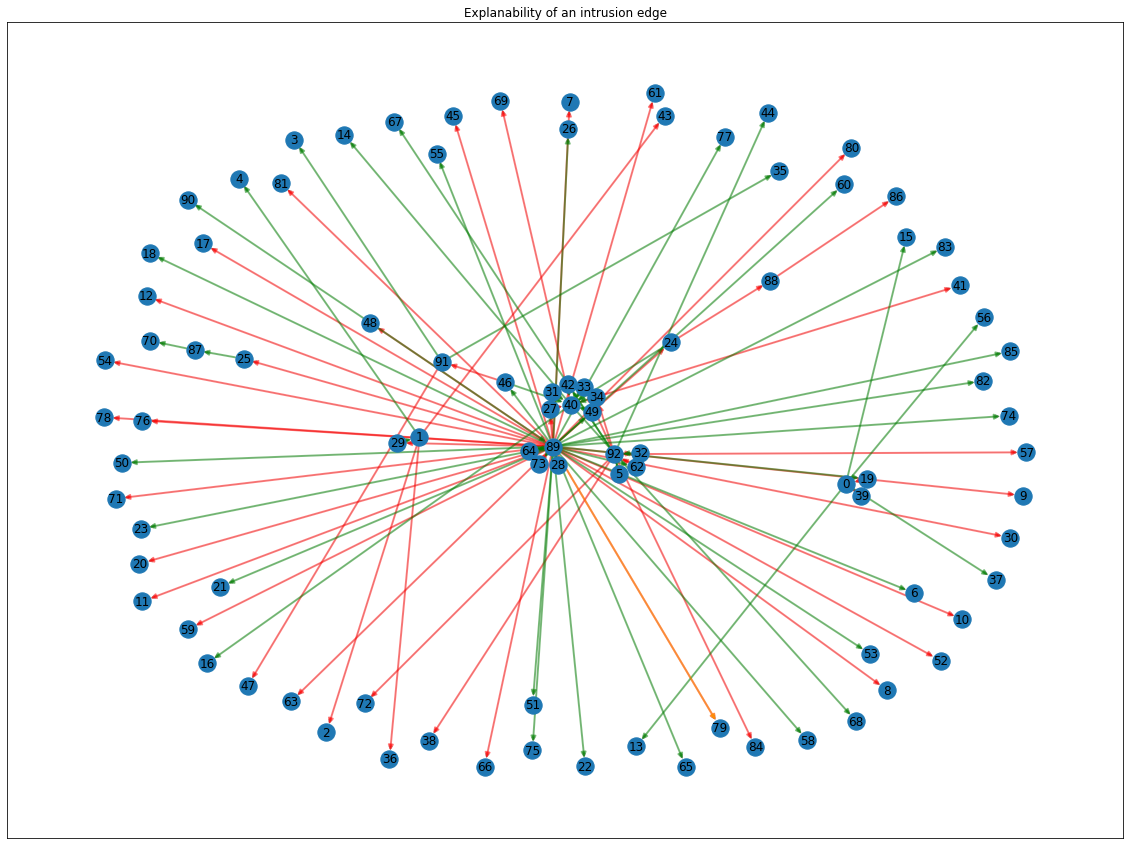

In [226]:
important_edges = []
not_important_edges = []

for i, x in enumerate(edge_mask_intrusion_round):
    if int(x.item()) == 0:
        not_important_edges.append(list(nx_graph_1.edges())[i])
    elif int(x.item()) == 1:
        important_edges.append(list(nx_graph_1.edges())[i])

        
pos = nx.spring_layout(nx_graph_1, seed=3113794652)  # positions for all nodes

plt.figure(figsize=[20,15])
plt.title("Explanability of an intrusion edge")
nx.draw_networkx_edges(nx_graph_1, pos, width = 0.5, alpha = 0.2)
nx.draw_networkx_edges(
    nx_graph_1,
    pos,
    edgelist = important_edges,
    width = 2,
    alpha = 0.5,
    edge_color = "red",
)
nx.draw_networkx_edges(
    nx_graph_1,
    pos,
    edgelist = not_important_edges,
    width = 2,
    alpha = 0.5,
    edge_color = "green",
)
nx.draw_networkx_edges(
    nx_graph_1,
    pos,
    edgelist = [list(nx_graph_1.edges())[edge_indice_1]],
    width = 2,
    alpha = 0.5,
    edge_color = "orange",
)


nx.draw_networkx_nodes(nx_graph_1, pos)
nx.draw_networkx_labels(nx_graph_1, pos)

{0: Text(-0.11967468838529904, 1.0, '0'),
 1: Text(-0.035801453655371955, -0.003011707200521525, '1'),
 2: Text(0.12650742308460525, -0.12507227145579186, '2'),
 3: Text(-0.09041282056613885, 0.20196401690520796, '3'),
 4: Text(-0.7057680679044459, 0.7431512460352302, '4'),
 5: Text(-0.41535066883871974, -0.8041076716136643, '5'),
 6: Text(0.5686458077318556, -0.688832935835787, '6'),
 7: Text(-0.2310854867989279, 0.9507774248074234, '7'),
 8: Text(0.7586672595340475, -0.6477625319432726, '8'),
 9: Text(0.9737524536506731, -0.16110109451460364, '9'),
 10: Text(-0.07857002393470078, -0.027892399255142582, '10'),
 11: Text(-0.9674263757561378, -0.3063930552960657, '11'),
 12: Text(0.1875248727925131, 0.23417191851987806, '12'),
 13: Text(0.37033557837489833, -0.8174802205550923, '13'),
 14: Text(-0.5328046872537763, 0.8422824890052115, '14'),
 15: Text(0.7895251451092935, 0.48711027994425043, '15'),
 16: Text(-0.8247958479368913, -0.5690772595826881, '16'),
 17: Text(-0.8150544078095467,

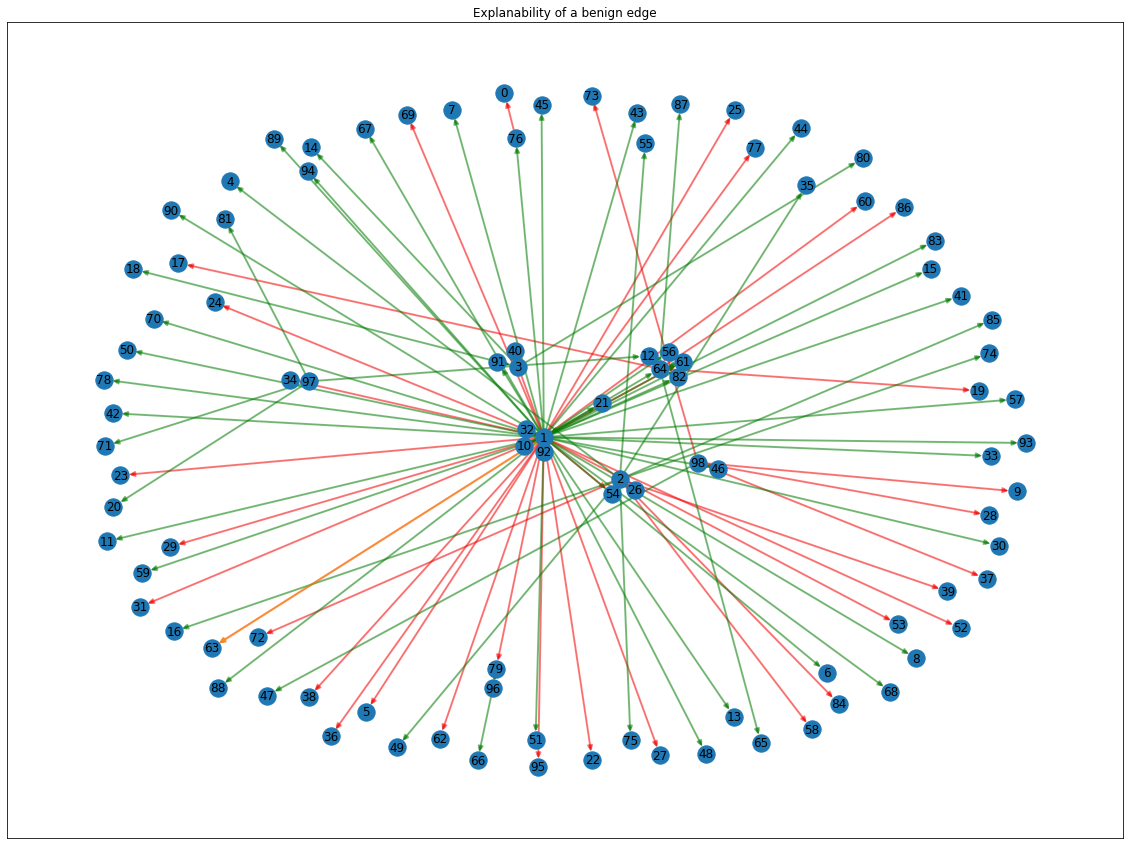

In [227]:
important_edges = []
not_important_edges = []

for i, x in enumerate(edge_mask_benign_round):
    if int(x.item()) == 0:
        not_important_edges.append(list(nx_graph_0.edges())[i])
    elif int(x.item()) == 1:
        important_edges.append(list(nx_graph_0.edges())[i])

        
pos = nx.spring_layout(nx_graph_0, seed=3113794652)  # positions for all nodes

plt.figure(figsize=[20,15])
plt.title("Explanability of a benign edge")
nx.draw_networkx_edges(nx_graph_0, pos, width = 0.5, alpha = 0.2)
nx.draw_networkx_edges(
    nx_graph_0,
    pos,
    edgelist = important_edges,
    width = 2,
    alpha = 0.5,
    edge_color = "red",
)
nx.draw_networkx_edges(
    nx_graph_0,
    pos,
    edgelist = not_important_edges,
    width = 2,
    alpha = 0.5,
    edge_color = "green",
)
nx.draw_networkx_edges(
    nx_graph_0,
    pos,
    edgelist = [list(nx_graph_0.edges())[edge_indice_0]],
    width = 2,
    alpha = 0.5,
    edge_color = "orange",
)


nx.draw_networkx_nodes(nx_graph_0, pos)
nx.draw_networkx_labels(nx_graph_0, pos)